# 📊 Automobile Sales Analysis During Recession Periods

This notebook explores historical trends in automobile sales, particularly during recessionary periods. Using a dataset that includes variables like GDP, unemployment rate, vehicle price, consumer confidence, and advertising expenditure, we aim to understand how economic downturns affected the automotive industry.

---

### 🕰 Recession Periods Considered:
1. 1980
2. 1981–1982
3. 1991
4. 2000–2001
5. Late 2007 to mid-2009
6. Sep–Dec 2020 (COVID-19 impact)

---

### 📁 Dataset Overview:
| Feature | Description |
|--------|-------------|
| `Date` | Monthly timestamp |
| `Recession` | Binary flag (1 = Recession, 0 = Non-recession) |
| `Automobile_Sales` | Monthly vehicle sales |
| `GDP` | Per capita GDP (USD) |
| `Unemployment_Rate` | Unemployment rate (%) |
| `Consumer_Confidence` | Index of consumer sentiment |
| `Seasonality_Weight` | Seasonal adjustment factor |
| `Price` | Average vehicle price |
| `Advertising_Expenditure` | Monthly ad spending |
| `Vehicle_Type` | Type of vehicle sold |
| `Competition` | Market competitiveness |
| `Month`, `Year` | Extracted from the `Date` column |

---

In [2]:
# Install required libraries
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import essential libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

print("Libraries successfully imported.")

Libraries successfully imported.


In [4]:
# Download the dataset from a remote server
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
response.raise_for_status()  # Raise error for bad response

# Load CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))
print("Dataset loaded into DataFrame.")

Dataset loaded into DataFrame.


In [6]:
# Display the first few rows of the dataset
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


## 📈 Yearly Sales Trend

This line plot shows how average annual automobile sales have fluctuated over time. This view helps visualize the broader market trends, especially across recession periods.

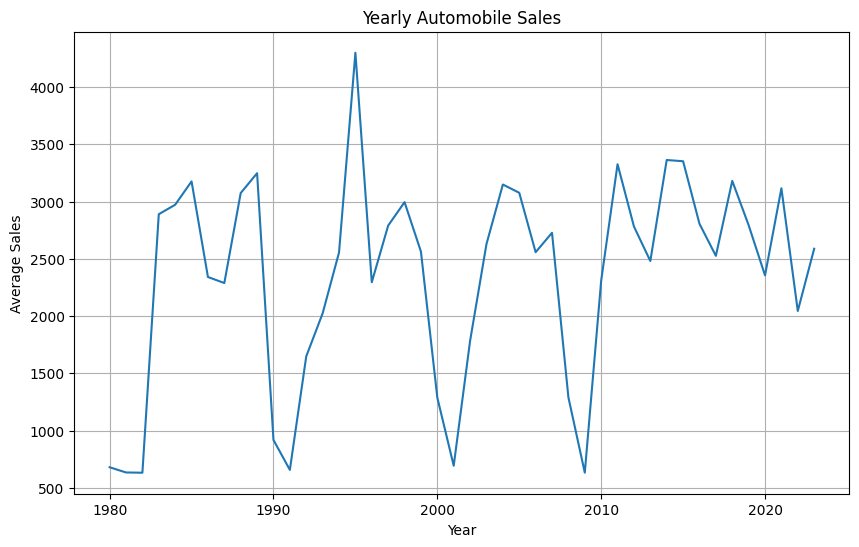

In [7]:
# Calculate yearly average sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Plot the yearly sales trend
plt.figure(figsize=(10, 6))
yearly_sales.plot()
plt.title('Yearly Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

## 📉 Automobile Sales with Recession Highlights

This plot overlays recession annotations on top of the yearly sales trend to observe any dips during recession years.

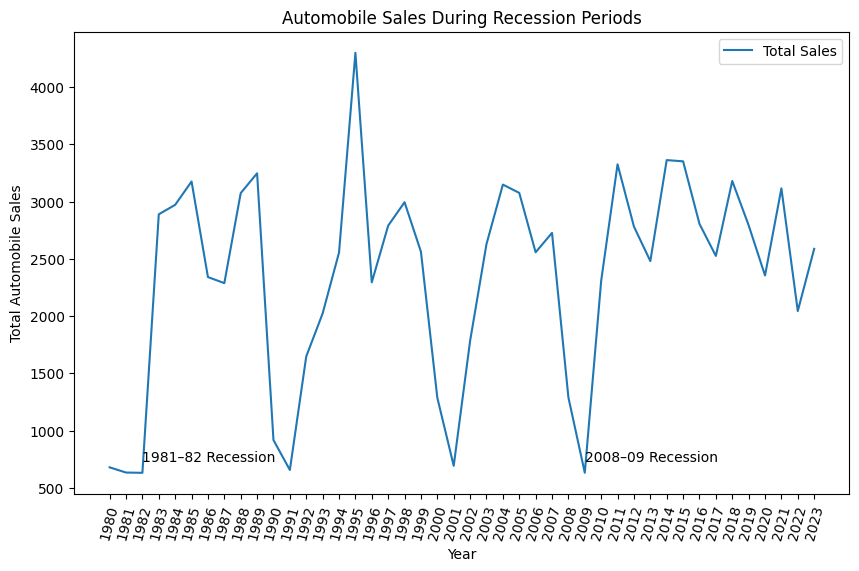

In [11]:
plt.figure(figsize=(10, 6))
yearly_sales.plot()
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.title('Automobile Sales During Recession Periods')

# Annotate specific recessions
plt.text(1982, yearly_sales.get(1982, 0) + 100, '1981–82 Recession')
plt.text(2009, yearly_sales.get(2009, 0) + 100, '2008–09 Recession')

plt.legend(['Total Sales'])
plt.show()

## 🚗 Vehicle Type Sales Trends During Recession

This line plot compares normalized sales trends of different vehicle types during recession years. Normalization allows us to focus on **relative changes**, making trends easier to compare across vehicle types with varying base sales levels.

# Filter the data for recession periods only
df_rec = df[df['Recession'] == 1]

# Calculate average sales by vehicle type and year
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Normalize sales by vehicle type (relative to mean)
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set 'Year' as index for plotting
df_Mline.set_index('Year', inplace=True)

# Define colors for each vehicle type
vehicle_colors = {
    'Mediumfamilycar': 'blue',
    'Smallfamiliycar': 'orange',
    'Supperminicar': 'red',
    'Sports': 'yellow',
    'Executivecar': 'black',
}

# Plot normalized sales trends
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    color = vehicle_colors.get(vehicle_type, 'black')
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o', color=color)

# Add vertical lines for recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.xlabel("Year")
plt.ylabel("Normalized Sales")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 📌 Insight:

- **Sports cars** showed relatively **stable or increasing** sales during recessions.
- **Supermini cars** experienced a **noticeable drop**.
- **Family cars** showed **fluctuating patterns**, with no consistent direction.
- **Executive cars** had **very low or no sales**, except a spike in 1991.

These trends suggest consumers likely favored practical or luxury-free options during economic downturns.

## 📊 Vehicle-Wise Sales: Recession vs Non-Recession

We compare the **average automobile sales** for each vehicle type across recession and non-recession periods to assess which segments were most impacted.


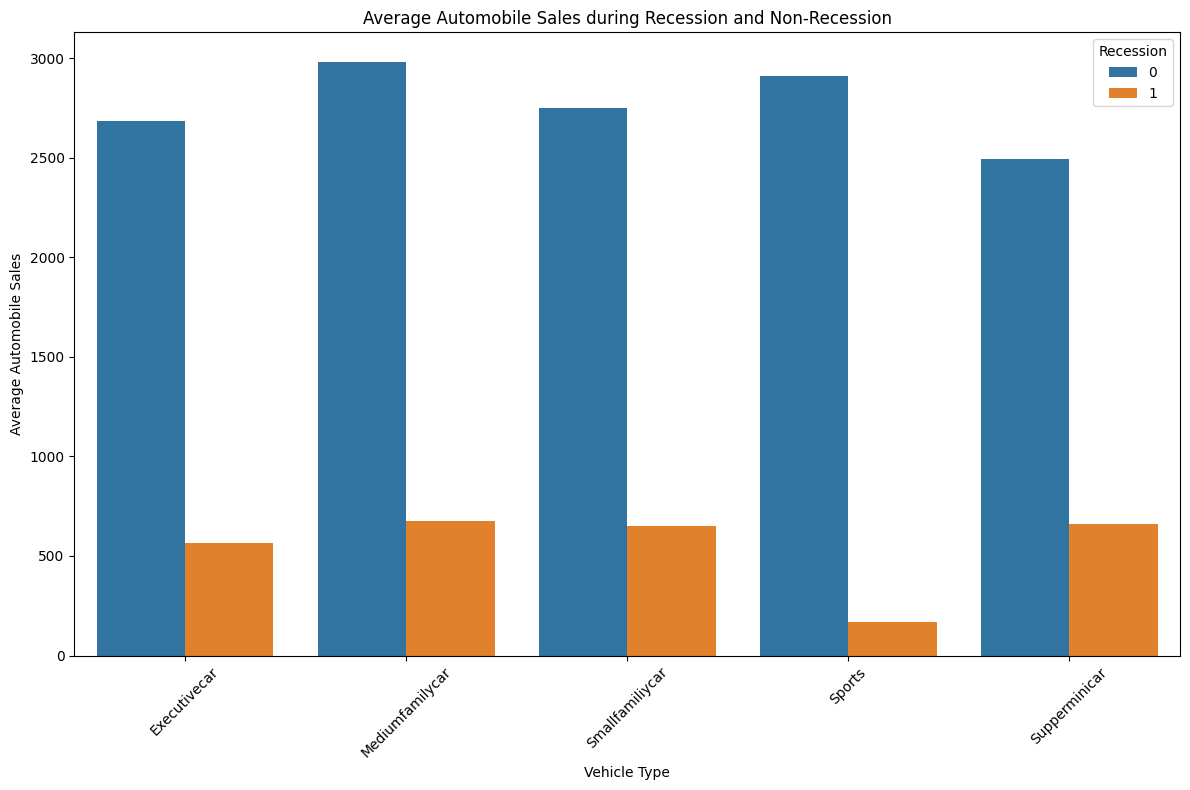

In [24]:

new_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=new_df)

plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

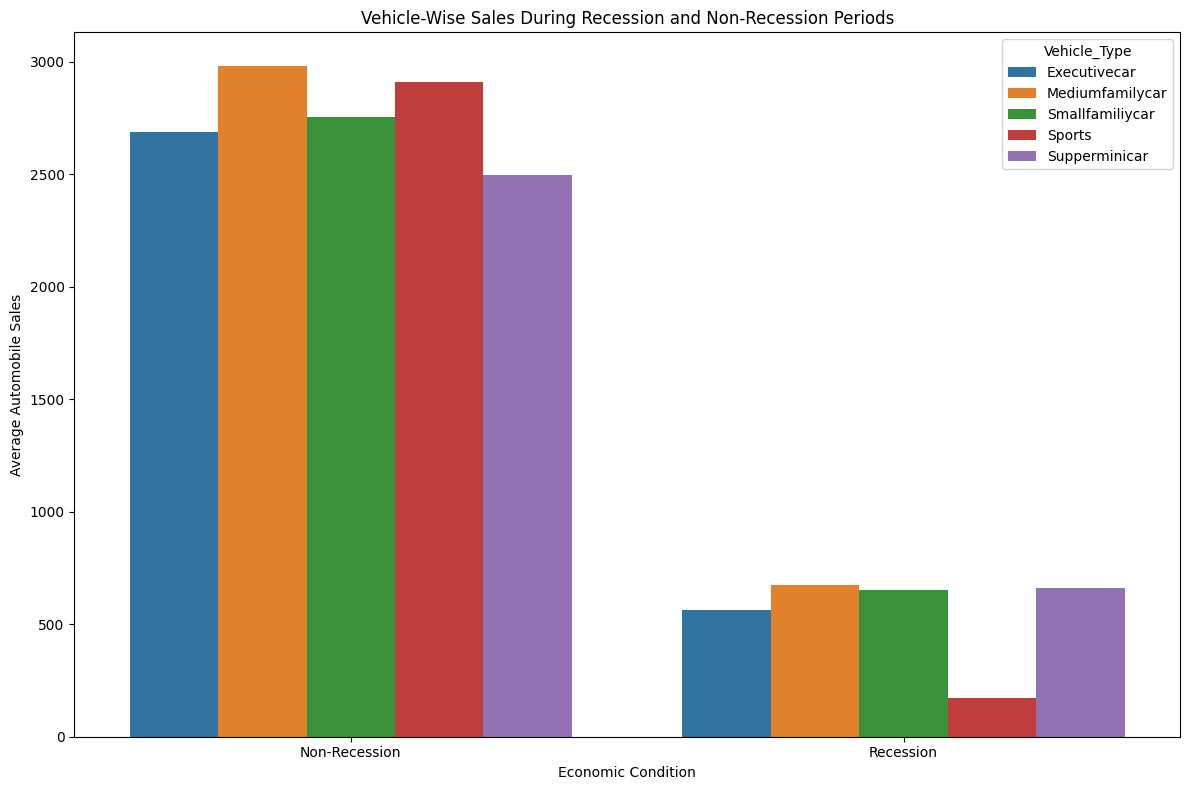

In [14]:
# Group by recession status and vehicle type
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)

plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Condition')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales During Recession and Non-Recession Periods')
plt.tight_layout()
plt.show()

### 📌 Insight:

As expected, there is a **general decline in sales** during recession years. Notably, **sports cars** faced the sharpest drop—likely due to their status as non-essential luxury goods.

## 💸 GDP Variation: Recession vs Non-Recession

This subplot compares GDP trends over time, separately for recession and non-recession periods. It helps evaluate how GDP levels correlate with dips in vehicle sales.

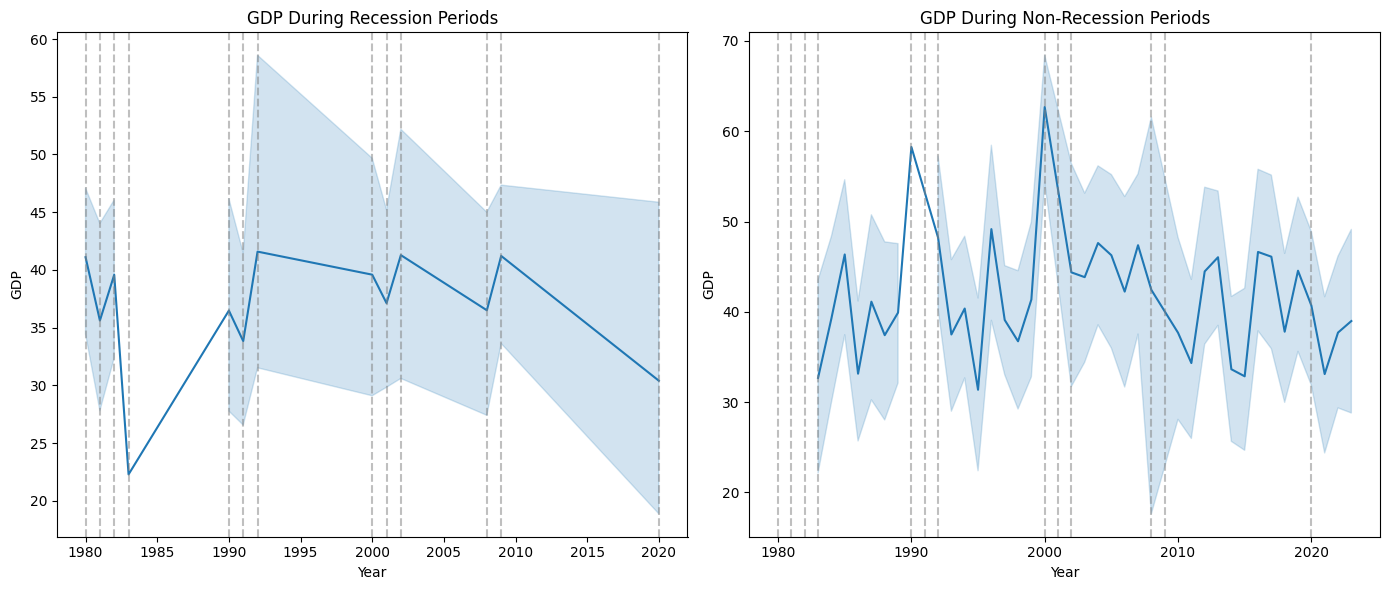

In [16]:
# Split data into recession and non-recession subsets
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create subplots
fig = plt.figure(figsize=(14, 6))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# Line plot for GDP during recession
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0)
ax0.set_title('GDP During Recession Periods')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')

# Line plot for GDP during non-recession
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1)
ax1.set_title('GDP During Non-Recession Periods')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

# Add vertical lines for recession years
for year in rec_data['Year'].unique():
    ax0.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 📌 Insight:

GDP levels were generally **lower and more volatile** during recession periods, especially in 2008–2009 and 2020. This economic contraction likely influenced reduced automobile purchases.

## 📅 Seasonality and Automobile Sales

This bubble plot analyzes how **seasonal variation** impacts monthly sales during **non-recession periods**. Bubble

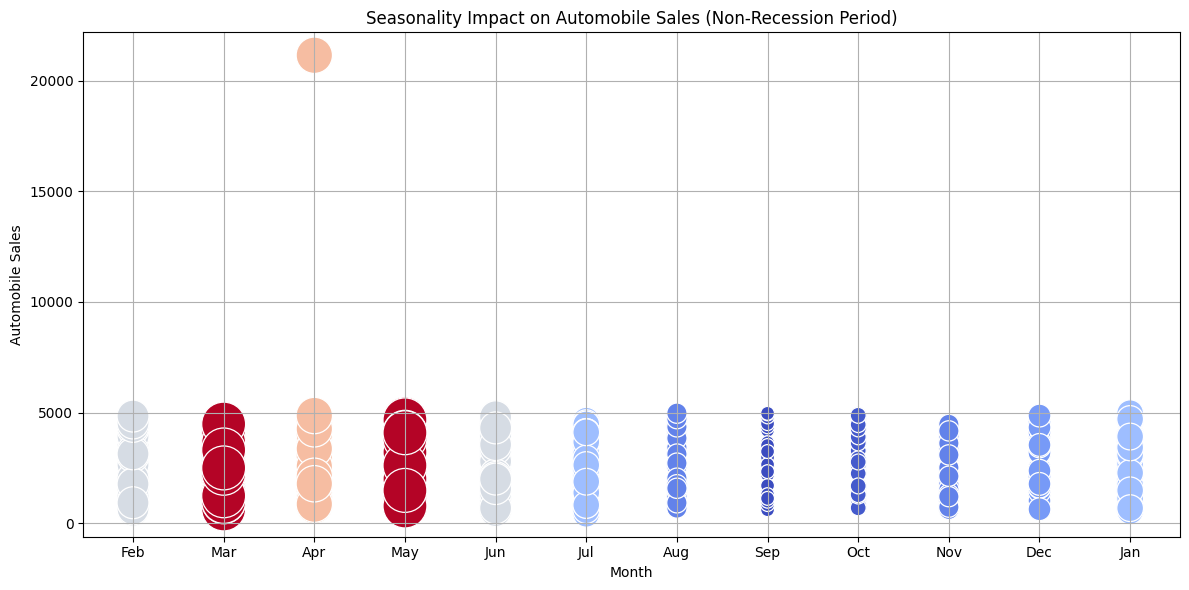

In [17]:
# Filter data for non-recession periods
non_rec_data = df[df['Recession'] == 0]

# Create bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=non_rec_data,
    x='Month',
    y='Automobile_Sales',
    size='Seasonality_Weight',
    hue='Seasonality_Weight',
    sizes=(100, 1000),
    palette='coolwarm',
    legend=False
)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales (Non-Recession Period)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📌 Insight:

The plot shows **no strong monthly seasonality pattern** in non-recession years. However, there is a drastic raise in sales in the month of April.

## 💬 Impact of Consumer Confidence on Sales (Recession Only)

A scatter plot to understand whether **consumer sentiment** (confidence index) correlates with automobile sales during **recession years**.

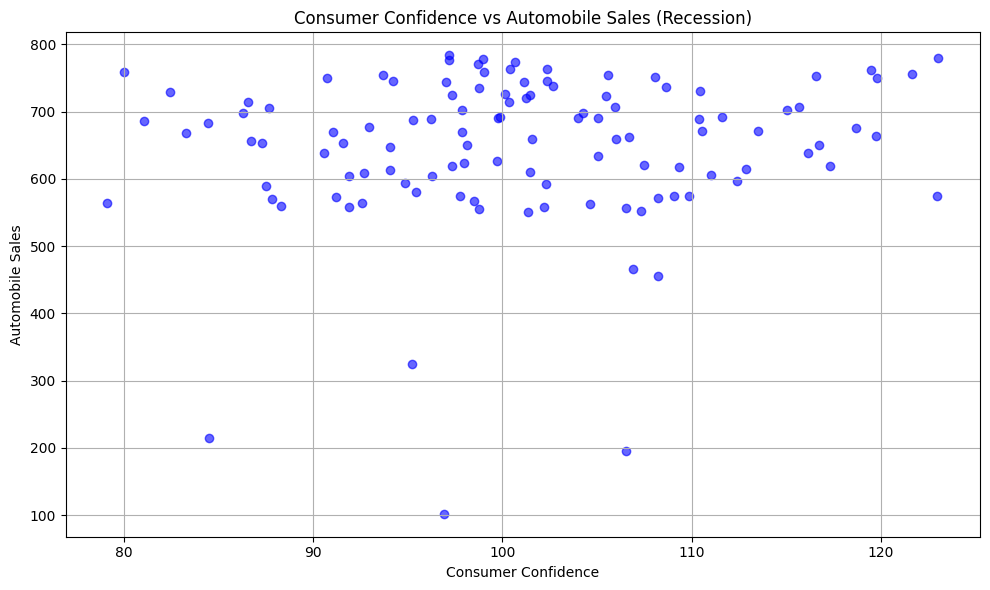

In [18]:
# Filter data for recession years
rec_data = df[df['Recession'] == 1]

# Scatter plot: Consumer Confidence vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='blue', alpha=0.6)

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales (Recession)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📌 Insight:

The relationship appears weak. Consumer confidence **alone may not be a strong predictor** of sales during recession periods, though extreme lows could impact big-ticket spending.

## 💲 Vehicle Price and Sales Volume Relationship

Here we examine whether higher vehicle prices discourage sales volume during recession periods.

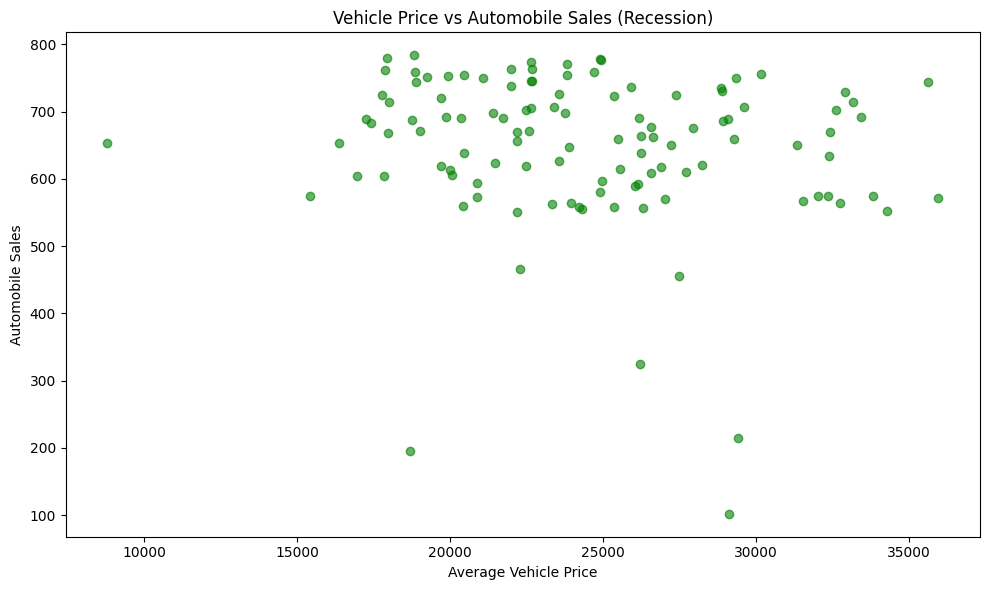

In [19]:
# Scatter plot: Price vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='green', alpha=0.6)

plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Vehicle Price vs Automobile Sales (Recession)')
plt.tight_layout()
plt.show()

### 📌 Insight:

There is **no strong correlation** between price and sales in this plot—suggesting that **other factors** like unemployment, consumer sentiment, or advertising may play a more important role during recessions.

## 📢 Advertising Spend: Recession vs Non-Recession

This pie chart shows how much XYZAutomotives invested in advertisements across economic conditions.

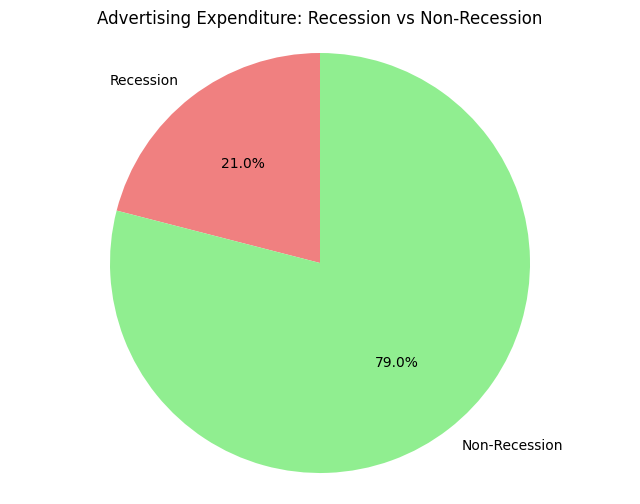

In [20]:
# Split data by economic condition
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate total advertising expenditure
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    [RAtotal, NRAtotal],
    labels=['Recession', 'Non-Recession'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightgreen']
)

plt.title('Advertising Expenditure: Recession vs Non-Recession')
plt.axis('equal')  # Keeps pie chart circular
plt.show()

### 📌 Insight:

XYZAutomotives **significantly reduced ad spend during recession**—a common business strategy to cut costs during economic contractions.

## 🚘 Advertising by Vehicle Type (Recession)

Here we break down how advertising funds were allocated across vehicle types **during recession periods only**.

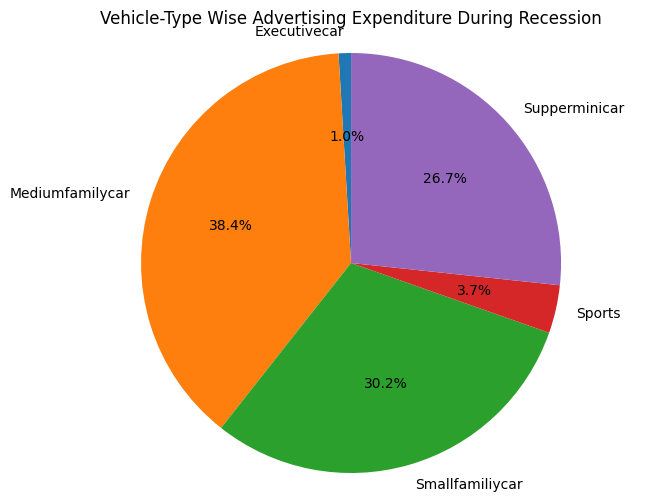

In [21]:
# Group advertising expenditure by vehicle type
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Pie chart for advertising by vehicle type
plt.figure(figsize=(8, 6))
plt.pie(VTexpenditure.values, labels=VTexpenditure.index, autopct='%1.1f%%', startangle=90)

plt.title('Vehicle-Type Wise Advertising Expenditure During Recession')
plt.axis('equal')
plt.show()

### 📌 Insight:

During recession years, most ad budgets were directed toward **more affordable, lower-end vehicles**, which aligns with consumer demand for cost-effective options in tough times.

## 📉 Effect of Unemployment Rate on Vehicle Sales (Recession Only)

This line plot shows how sales for different vehicle types correlate with unemployment levels during recession years.

C:\Users\dolla\AppData\Local\Temp\ipykernel_23332\229725281.py:15: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


Text(0.5, 1.0, 'Effect of Unemployment Rate on Vehicle Sales During Recession')

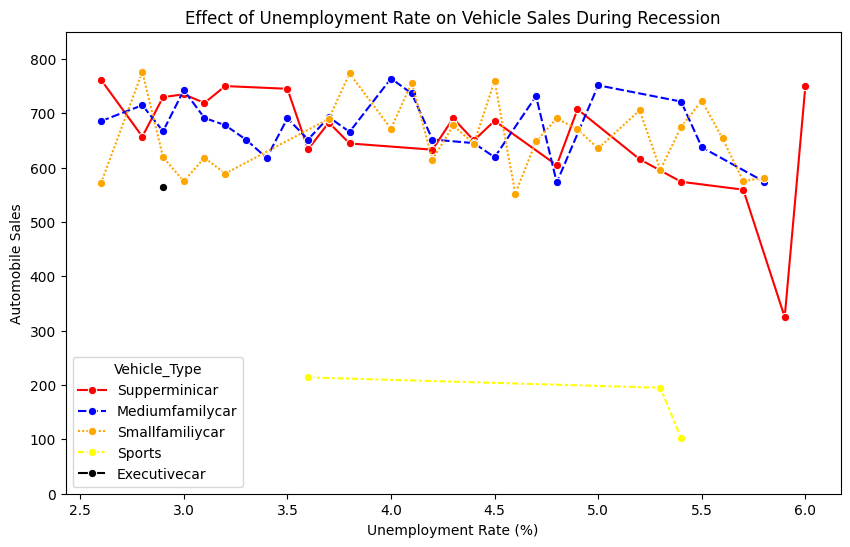

In [22]:
# Filter data for recession period
df_rec = df[df['Recession'] == 1]

# Define consistent color palette
vehicle_colors = {
    'Mediumfamilycar': 'blue',
    'Smallfamiliycar': 'orange',
    'Supperminicar': 'red',
    'Sports': 'yellow',
    'Executivecar': 'black'
}

# Create lineplot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_rec,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    style='Vehicle_Type',
    markers='o',
    err_style=None,
    palette=vehicle_colors
)

# Customize chart
plt.ylim(0, 850)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Sales During Recession')


### 📌 Insight:

- **Sports car sales decline sharply** with higher unemployment—likely due to their luxury status.
- Other vehicle types show **inconsistent or minimal patterns**, indicating that unemployment may not be the sole factor influencing sales in those segments.

## 🗺️ Top Sales Regions During Recession (Map View)

This interactive choropleth map displays total automobile sales across U.S. states during recession years.

In [25]:
import json

# Define download function
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

# Download US states geojson
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")

# Prepare recession data by city/state
recession_data = df[df['Recession'] == 1]

# Group by city (or use 'State' if available in the dataset)
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create base map
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create choropleth layer
choropleth = folium.Choropleth(
    geo_data='us-states.json',
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',  # Match GeoJSON key
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales During Recession'
).add_to(map1)

# Add hover tooltip
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1